# **06. bubbleplot(버블 차트) 실습**
</br>
<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png">
</br>

* matplotlib 문법 관련 공식 문서 : https://matplotlib.org/stable/api/pyplot_summary.html
* seaborn scatterplot 문법 관련 공식 문서 : https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## **PART1. 각종 세팅**

In [1]:
# 필요 패키지 호출
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 실습용 데이터가 저장된 폴더
path = r'C:\HANSSAK\SecureGate\Download\DT_Python 시각화'
print('작업 폴더 주소 : ', path)

# 출력 옵션 지정
pd.set_option('display.width', 2000)                  # 한줄에 표시할 컬럼 관련
pd.set_option('display.max_colwidth', None)           # 최대 컬럼너비 (None 지정시 데이터 생략 없음)
pd.options.display.float_format = '{:.2f}'.format     # 표시할 숫자 형식 (지수형태 표현에서 소숫점 2자리까지로)

작업 폴더 주소 :  C:\HANSSAK\SecureGate\Download\DT_Python 시각화


## **PART2. 데이터 로드**

In [15]:
# 데이터 로드 및 정보 / 요약통계량 확인
# pd.read_csv() 메서드 사용

# 데이터프레임명 : df
# 사용할 rawfile : pfjan_FS_total.csv
# 한글 인코딩 형식 : cp949

df = pd.read_csv(path + r'\pfjan_FS_total.csv', encoding = 'cp949')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71997 entries, 0 to 71996
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   고객번호        71997 non-null  int64  
 1   지역          71997 non-null  object 
 2   업종대분류코드     71997 non-null  object 
 3   결산종료일       71997 non-null  object 
 4   BS_0005900  71997 non-null  int64  
 5   BS_0009100  71601 non-null  float64
 6   BS_0011300  71837 non-null  float64
 7   IS_0000100  71997 non-null  int64  
 8   IS_0002700  71764 non-null  float64
 9   부채비율        71438 non-null  float64
 10  영업이익률       71764 non-null  float64
 11  총자산회전율      71764 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 6.6+ MB


,고객번호,BS_0005900,BS_0009100,BS_0011300,IS_0000100,IS_0002700,부채비율,영업이익률,총자산회전율
count,71997.00,71997.00,71601.00,71837.00,71997.00,71764.00,71438.00,71764.00,71764.00
mean,64809549.89,4294.73,2722.80,1590.44,5931.32,159.36,426.04,-22.50,4.06
std,19562739.50,11806.67,7754.36,4737.54,15037.79,898.19,4317.00,685.65,76.86
min,22606.00,1.00,-12.00,-37670.00,1.00,-68563.00,-272500.00,-88300.00,-9500.00
25%,62968740.00,700.00,396.00,186.00,854.00,16.00,69.94,0.99,1.44
50%,72248159.00,1707.00,974.00,605.00,2294.00,72.00,159.59,3.39,4.56
75%,75729882.00,4196.00,2536.00,1595.00,5721.00,203.00,306.88,6.86,9.76
max,88175300.00,527364.00,407843.00,252091.00,1216102.00,64362.00,371200.00,100.00,8600.00


### **(참고) 재무제표 계정과목 코드 의미**
* BS_0005900 : 자산총계
* BS_0009100 : 부채총계
* BS_0011300 : 자본총계
* IS_0000100 : 매출액
* IS_0002700 : 영업이익

In [3]:
# 상위 5개 관측치 확인


,고객번호,수도권소재지기업구분지역명,업종대분류코드,결산종료일,BS_0005900,BS_0009100,BS_0011300,IS_0000100,IS_0002700,부채비율,영업이익률
0,22606,경북,C,2020-12-31,12686,10459.00,2227.00,10364.00,599.00,469.65,5.78
1,26819,경기,C,2020-12-31,194591,105178.00,89413.00,117551.00,13681.00,117.63,11.64
2,40811,충북,C,2020-12-31,26184,15348.00,10836.00,29878.00,1043.00,141.64,3.49
3,41357,충남,G,2020-12-31,266434,127775.00,138659.00,168286.00,597.00,92.15,0.35
4,43494,충북,C,2020-12-31,5768,4317.00,1451.00,7272.00,191.00,297.52,2.63


## **PART3. 데이터 집계**

* 주사업장소재지(시도)별로 부채비율, 영업이익률의 중위수와 업체수를 집계
    * 재무비율의 집계함수는 중위수(median) 사용
    * 업체수는 고객번호의 개수를 세는 방법 (count 함수) 사용
      
* pd.pivot_table()메서드의 aggfunc = 파라미터의 값으로 딕셔너리를 전달하면 컬럼별로 다른 함수 적용 가능
    * ex) aggfunc = {'컬럼명1' : '집계함수1', '컬럼명2' : '집계함수2'}
    * 참고) 주요 집계함수 종류:
        * sum (합계)
        * count (개수)
        * mean (평균)
        * median (중위수)
        * mode (최빈값)
        * std (표본표준편차)
        * var (표본분산)
        * min (최솟값)
        * max (최댓값)

In [17]:
# pd.pivot_table() 메서드 사용
df_agg = 

# 컬럼명 변경(고객번호 => 업체수)
df_agg

# 업체수 많은 순서대로 정렬
df_agg

# 업체수 하위 3개 지역 제거 
df_agg =

,지역,업체수,부채비율,영업이익률,총자산회전율
1,경기,20123,174.52,3.68,4.96
9,서울,14412,142.28,2.21,3.97
8,부산,5045,182.32,3.20,4.40
2,경남,4348,198.70,4.16,4.25
12,인천,4011,179.86,3.67,5.11
3,경북,3527,176.39,3.72,4.02
5,대구,3034,159.44,3.59,4.19
16,충남,2812,162.54,3.93,4.53
13,전남,2616,116.54,4.35,5.09
6,대전,2396,112.96,3.68,5.41


## **PART4. 그래프 생성**

In [4]:
# Seaborn 스타일 설정
sns.set_style('whitegrid')

# 한글폰트 관련 패치
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

#### **PART4-1. 일반적인 산점도 행렬**

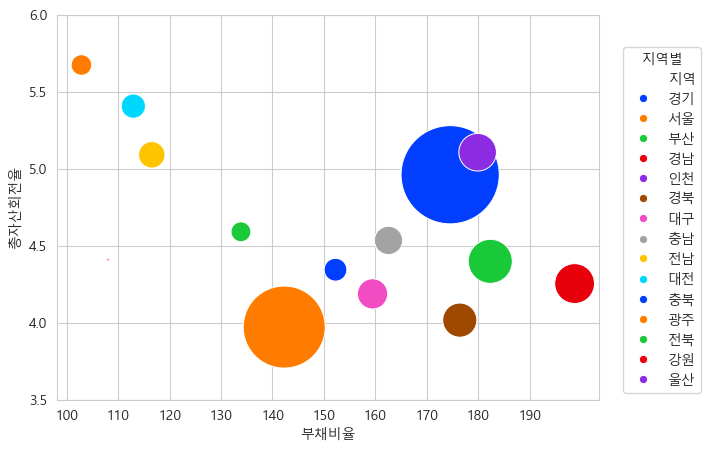

In [33]:
# 도화지 / 좌표계 / 그래프 객체 생성
# x축은 부채비율, y축은 영업이익률의 크기, 버블의 크기는 업체수를 나타내도록 하되,
# 지역별로 버블의 색이 다르게 표시되도록 할 것
# sizes = 옵션을 바꿔가며 버블의 크기가 어떻게 바뀌는지 확인할 것
# 추천 palette = 'bright'
# 적절한 x / y축 범위 및 눈금 간격을 지정할 것

fig = plt.figure(figsize = [7, 5])
ax = plt.axes()
plot = 

# 범례 관련 코드로, 개념이 너무 복잡해 설명 생략
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles[:-6], labels[:-6], loc='lower right', title = '지역별', bbox_to_anchor = (1.2, 0), ncol =1 );

#### **👉 영남권 업체의 경우 차입금이 많고 수익성이 나쁘고, 호남권 업체의 경우 차입금이 적고 수익성이 좋은 경향**
* 공단내 입지 여부, 자가 사업장 보유 여부 및 주요 업종 비중 등 추가적인 분석 가능